#  Import Libraries

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [180]:
import warnings 
warnings.filterwarnings('ignore')

# Read Dataset

In [59]:
data = pd.read_csv(r"E:\Datasets\Titanic\train.csv")

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [61]:
data.shape

(891, 12)

In [62]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
data['Sex'].isnull().sum()

0

In [65]:
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [66]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [67]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
data['Embarked'].isnull().sum()

2

In [69]:
data.loc[data['Embarked'].isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [70]:
data.loc[data['Embarked'].isna(), 'Embarked'] = 'S'
data['Embarked'] = data['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} ).astype(int)

In [71]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


In [72]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [73]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.536476
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [74]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [75]:
data['Sex'].value_counts(normalize=True)*100

1    64.758698
0    35.241302
Name: Sex, dtype: float64

In [76]:
data['Embarked'].value_counts(normalize=True)*100

3    72.502806
1    18.855219
2     8.641975
Name: Embarked, dtype: float64

In [77]:
len(data[ data.Age <= 40 ])

564

In [78]:
data.groupby( 'Sex' )['Age'].mean()

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [79]:
data.groupby( 'Survived' )['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [80]:
data['family'] = data['SibSp'] + data['Parch']

In [81]:
data.groupby( 'Embarked' )['Survived'].sum()

Embarked
1     93
2     30
3    219
Name: Survived, dtype: int64

In [82]:
data['Embarked'].value_counts()

3    646
1    168
2     77
Name: Embarked, dtype: int64

# Visualizaion

C:\Users\USER\AppData\Local\Temp\ipykernel_12152\2509112781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap='flare')


<AxesSubplot: >

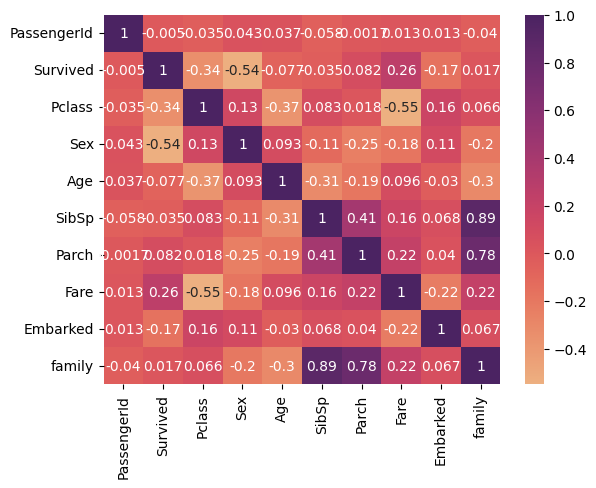

In [83]:
sns.heatmap(data.corr(), annot=True,cmap='flare')

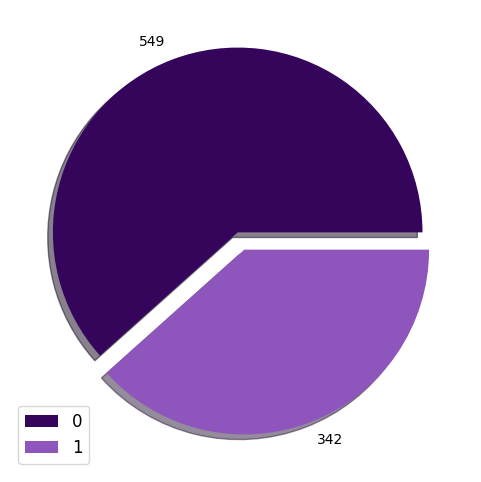

In [84]:
fig, ax = plt.subplots(ncols=1, figsize=(6,6))
explode = [0.05, 0.05]
color = ['#35055c', '#8e55bd']
d =  data['Survived'].value_counts()
ax.pie(d, labels=d.values, explode=explode, colors=color, shadow=True)
ax.legend(labels=data.index, fontsize='large')

In [105]:
data['count'] = 1
d = data[['Survived','Embarked','count']].groupby(['Survived','Embarked']).sum('count').reset_index()

In [106]:
d

,Survived,Embarked,count
0,0,1,75
1,0,2,47
2,0,3,427
3,1,1,93
4,1,2,30
5,1,3,219


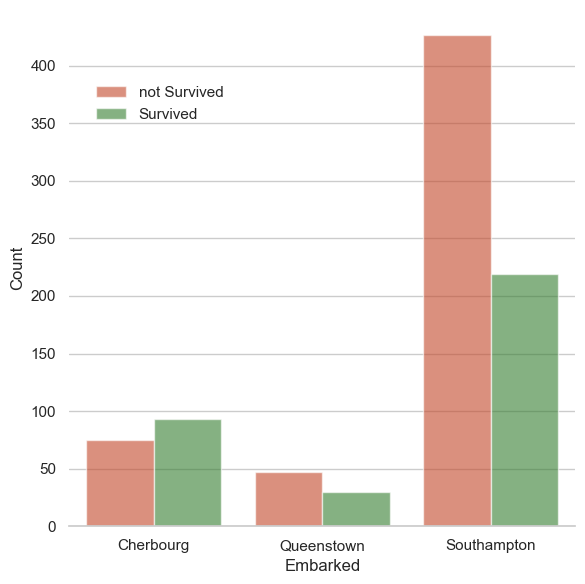

In [241]:
g = sns.catplot(
    data=d, kind="bar",
    x="Embarked", y="count", hue="Survived",
    errorbar="sd", alpha=.6, height=6 , palette={0: "#db380f", 1: "#298a22"}
)
Embarked = ["Cherbourg", "Queenstown", "Southampton"]
g.set_xticklabels(Embarked)

Survived = {0: "not Survived", 1: "Survived"}

for key, value in Survived.items():
    g.legend.texts[key].set_text(value)

g.despine(left=True)
g.set_axis_labels("Embarked", "Count")

g.legend.set_bbox_to_anchor((0.35, 0.8))

g.legend.set_title("")

In [156]:
data['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

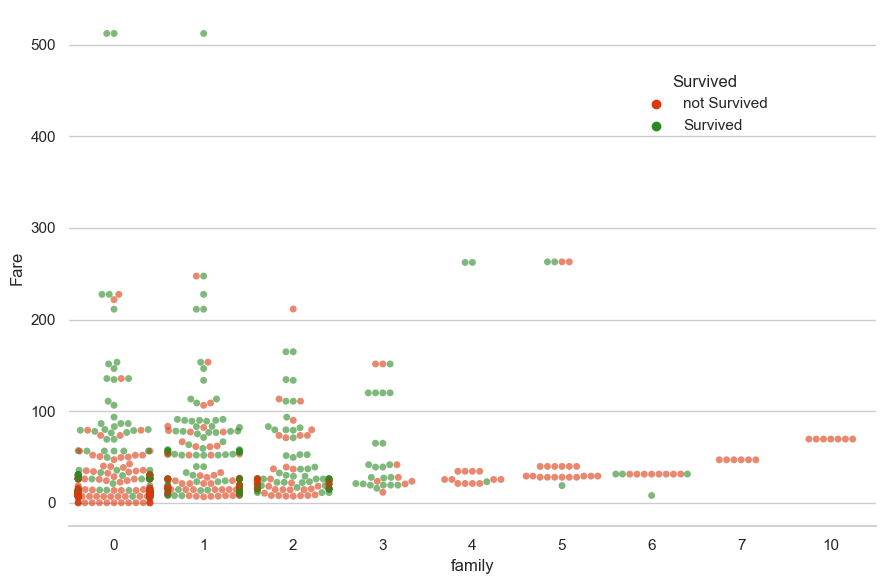

In [196]:
sns.set_theme(style="whitegrid")
f = sns.catplot(x="family", y="Fare", hue="Survived", kind="swarm",
                data=data, palette={0: "#db380f", 1: "#298a22"}, alpha=.6,
               height=6, aspect=1.5,
               )
Survived = {0: "not Survived", 1: "Survived"}

for key, value in Survived.items():
    f.legend.texts[key].set_text(value)
    
f.legend.set_bbox_to_anchor((0.8, 0.8))


f.despine(left=True)

In [189]:
# sns.set_theme(style="whitegrid")

# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# sizes_dict = {1: 'Small', 2: 'Medium', 3: 'Large', 4 :'ho'}

# g = sns.relplot(
#     data=data,
#     x="family", y="Fare", size='Sex',
#     hue="Survived", 
#      sizes=(10, 200), 
#     height=6, aspect=1.5,
#     legend=sizes_dict ,  palette={0: "#db380f", 1: "#298a22"}, kind = 'scatter'
# )

In [197]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,count
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,3,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,3,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,3,3,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,0,1


In [200]:
percent = data[['Pclass','count','Survived']].groupby('Pclass').sum(['Survived','count']).reset_index()

In [201]:
percent

,Pclass,count,Survived
0,1,216,136
1,2,184,87
2,3,491,119


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

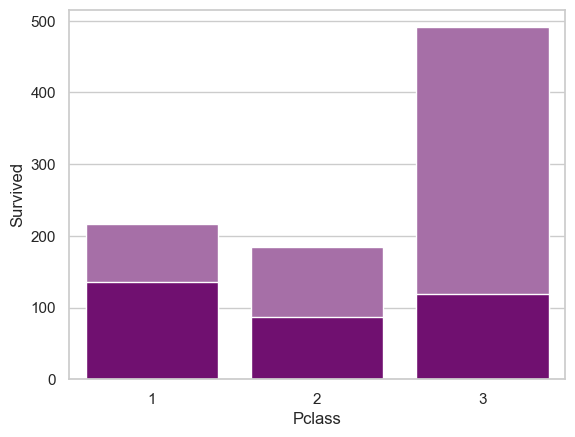

In [215]:


sns.set_color_codes("pastel")
sns.barplot(x="Pclass", y="count", data=percent,
            label="Total", color="#af66b0")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Pclass", y="Survived", data=percent,
            label="Survived", color="purple")



In [272]:
color = ['#af66b0','#6a1594','#480b66']
bins = [0,0.5,1]

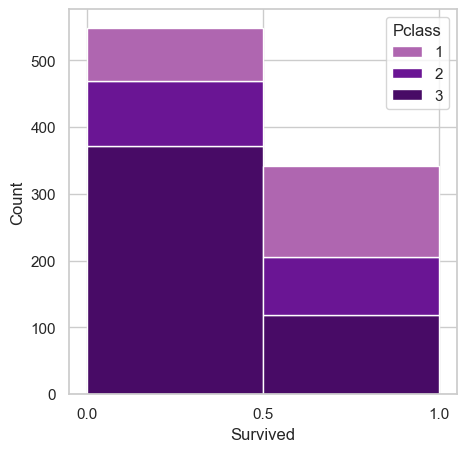

In [273]:
fig, ax = plt.subplots( figsize = (5,5))

sns.histplot(x = 'Survived',

            data = data ,alpha=1,hue = 'Pclass',palette = color ,multiple="stack",bins=bins)


plt.xticks(bins)

ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.show()

In [244]:
Pclass = data[['Pclass','count','Survived']].groupby(['Survived','Pclass']).sum('count').reset_index()

In [245]:
Pclass

,Survived,Pclass,count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


<AxesSubplot: xlabel='Pclass', ylabel='Embarked'>

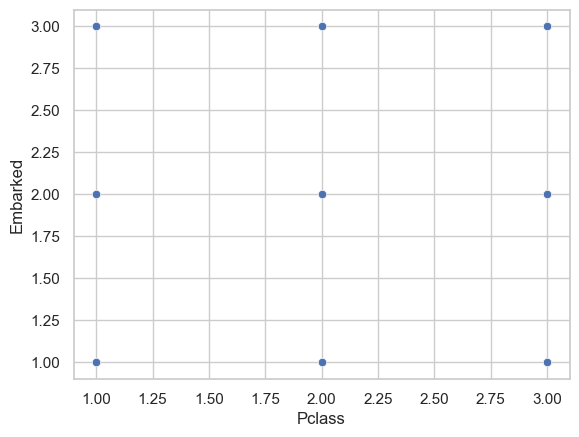

In [275]:

# رسم نمودار نقطه‌ای برای بررسی نظیر به نظیر دو ستون
sns.scatterplot(
    data=data, x="Pclass", y="Embarked",
)


In [281]:
p = data[['Pclass','Embarked','count']].groupby(['Pclass','Embarked']).sum('count').reset_index()

In [282]:
p

,Pclass,Embarked,count
0,1,1,85
1,1,2,2
2,1,3,129
3,2,1,17
4,2,2,3
5,2,3,164
6,3,1,66
7,3,2,72
8,3,3,353


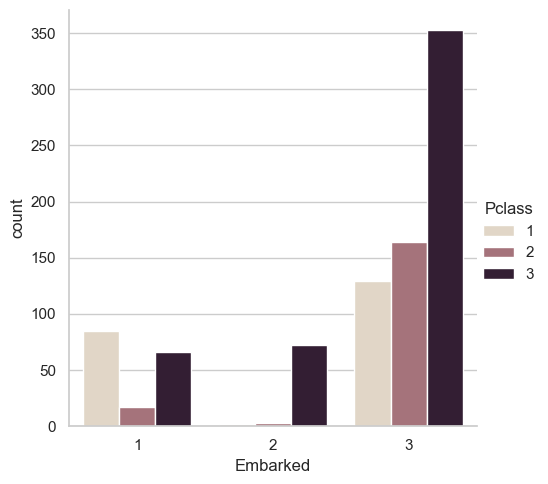

In [286]:
sns.catplot(x="Embarked", y="count", hue="Pclass", kind="bar", data=p,palette="ch:.25")

# split data

In [334]:
data['Age'] = data[['Age']].fillna(data['Age'].mean())

In [335]:
X = data[['Pclass','Sex','family','Age','Fare','Embarked']]
y = data['Survived']

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [337]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [338]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 6)
(668,)
(223, 6)
(223,)


# XGBoost

In [339]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [340]:
y_pred = model.predict(X_test)

In [341]:
accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
print("Accuracy of the Logistic Regression Model(train): ",accuracy)

Accuracy of the Logistic Regression Model(train):  96.7065868263473


In [342]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model(test): ",accuracy)

Accuracy of the Logistic Regression Model(test):  84.30493273542601


# SVM

In [366]:
# svclassifier = SVC(kernel='linear')
svclassifier = SVC(kernel='rbf')
# svclassifier = SVC(kernel='sigmoid')
# svclassifier = SVC(kernel='poly')

svclassifier.fit(X_train, y_train)

SVC()

In [367]:
y_pred = svclassifier.predict(X_test)

In [368]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  80.26905829596413


In [370]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[122  17]
 [ 27  57]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.77      0.68      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



# Decision Tree

In [375]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [376]:
y_pred = classifier.predict(X_test)

In [377]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  77.13004484304933


In [378]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[115  24]
 [ 27  57]]


0.7713004484304933

# Random Forest

In [380]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [381]:
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 0.9744597249508842


In [382]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.7926829268292684


In [384]:
rfc.feature_importances_

array([0.07232967, 0.22426209, 0.08017482, 0.30078763, 0.2858244 ,
       0.03662138])